### Long Tail analisis with US Billboard 100 since 1960.

The aim of this quick research is to understand how is evolving the long tail concept through the years by analysing ranking behaviors of No1 songs in US Billboard since 1960.

The Long Tail distribution is a term popularized by Chris Anderson in an article of WIRED in 2004, and developed in this book "The Long Tail: Why the Future of Business Is Selling Less of More".

It basically presents two types of market : 
- The mass market, centered in high revenue made by a few products only.
- The niche market, made by the sum of all the few sales done on many many products.

For Chris Anderson, the more we go, the more the niche market represents more value than the mass market, meaning that a company should better have a full variety of products than only a few products. Individualism is at a such level that consumers go each for a very distinctive product to differentiate themselves from the others. Mass market seems therefore to becomme less and less valuable.

Netflix, Amazon or the french artist Jul becoming in less than 6 years the most productive artist in France (nearly 350 songs released over 19 albums in 6 years) are different examples of generating a wide variety of products to please the most public possible.

In this analysis, I wanted to make a deep analisis of songs making up at least one time as No1 songs in one of the weekly US Billboard 100 charts. How did a song become No1 in the 1960's versus in 2010's ? How many of them did it ? How many artists ? How would they sell ? 

The idea behind is to acknowledge how vivid is the long tail concept of Chris Anderson and how it evolves through time.

The data is coming from data.word : https://data.world/kcmillersean/billboard-hot-100-1958-2017

# 1. Data Cleaning 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [6]:
charts = pd.read_csv("Hot Stuff.csv")
charts.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1


In [7]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320495 entries, 0 to 320494
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     320495 non-null  object 
 1   WeekID                  320495 non-null  object 
 2   Week Position           320495 non-null  int64  
 3   Song                    320495 non-null  object 
 4   Performer               320495 non-null  object 
 5   SongID                  320495 non-null  object 
 6   Instance                320495 non-null  int64  
 7   Previous Week Position  289711 non-null  float64
 8   Peak Position           320495 non-null  int64  
 9   Weeks on Chart          320495 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 24.5+ MB


Let's remove some unnecessary columns

In [8]:
charts.drop(columns=['url', 'Instance'], inplace=True)

## 1.1 Time Data

In [9]:
charts['WeekID']= pd.to_datetime(charts['WeekID'])

Let's still add the year and the decade to ease the research.    
Since the dataset starts in 1958 and we will mostly study it through decades, we will remove the lines related to the 50's

In [11]:
charts['Year'] = pd.DatetimeIndex(charts['WeekID']).year

In [12]:
def decade(year):
    if year < 1960 : 
        return "1950's"
    elif year <1970 : 
        return "1960's"
    elif year < 1980 :
        return "1970's"
    elif year < 1990 :
        return "1980's"
    elif year < 2000 :
        return "1990's"
    elif year < 2010 :
        return "2000's"
    else:
        return "2010's"

    
charts['Decade'] = charts['Year'].apply(decade)

In [13]:
charts.drop(charts[charts['Decade'] == "1950's"].index, inplace=True)

## 1.2 Performer Data

Let's check the Performer column and create consequently the Performer ID. Since we believe there might be duets, featuring and similar musical collaborations, let's check carefully to end up with a proper performer list.  
For a song with multiple singers (duet type), we will duplicate the entries of the song to display in each line the different singers.  
For a song with a featuring, we will just create a new column called 'Featuring' that will display the featured artist(s).

In [14]:
performer = pd.DataFrame(charts['Performer'].unique())
performer.rename(columns = {0 : 'Performer'}, inplace=True)

Let's check the different words in the Performer list

In [15]:
performer["Performer Lower"] = performer["Performer"].str.lower()
perf_word = pd.DataFrame(performer['Performer Lower'].str.split(expand=True).stack().value_counts().head(50))
perf_word

,0
featuring,2071
the,1493
&,1283
and,346
lil,222
with,191
brown,123
wayne,116
band,114
chris,114


We can see from the list than we have  
- 2072 songs with featurings, 
- 1298 songs with two artists ('&' sign), 
- 382 with 'and' in artist name, 
- 204 with 'with' 
- and 50 with 'x' sign which can be interpreted as duet as well. Let's check in deep this last one, just to be sure

In [16]:
performer[performer['Performer Lower'].str.contains(" x ")]

,Performer,Performer Lower
559,Lil Nas X & Cardi B,lil nas x & cardi b
604,XXXTENTACION x Lil Pump Featuring Maluma & Swa...,xxxtentacion x lil pump featuring maluma & swa...
639,"Lil Wayne, Wiz Khalifa & Imagine Dragons With ...","lil wayne, wiz khalifa & imagine dragons with ..."
702,Machine Gun Kelly x Camila Cabello,machine gun kelly x camila cabello
1383,Pedro Capo X Farruko,pedro capo x farruko
2589,Ellie Goulding X Diplo Featuring Swae Lee,ellie goulding x diplo featuring swae lee
2819,Linkin Park X Steve Aoki,linkin park x steve aoki
2822,Nicki Minaj X Mike WiLL Made-It,nicki minaj x mike will made-it
2870,SOB X RBE,sob x rbe
2901,Ozuna x Daddy Yankee x J Balvin x Farruko x An...,ozuna x daddy yankee x j balvin x farruko x an...


Except two artists which include a single x in their own name (lil nas x and x ambassadors), all others single 'x' are for duets songs. Let's change in the main dataframe 'charts', this 'x' por '&' to ease the research (without changing the name of the two artists mentionned above) and create a 'Collaboration' column in the dataset to keep a trace.  
We have also the key word 'Orchestra' (exact expression is "And His Orchestra"). To avoid future misunderstandings, we will concactenate this expression.

In [17]:
charts['Performer'] = charts['Performer'].str.replace('Lil Nas X','Lil NasX')
charts['Performer'] = charts['Performer'].str.replace('X Ambassadors','XAmbassadors')
charts['Performer'] = charts['Performer'].str.replace(' x ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' X ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' and ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' And ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' AND ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' With ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' with ',' & ')
charts['Performer'] = charts['Performer'].str.replace(' feat ',' Featuring ')
charts['Performer'] = charts['Performer'].str.replace(' feat. ',' Featuring ')
charts['Performer'] = charts['Performer'].str.replace(' featuring ',' Featuring ')
charts['Performer'] = charts['Performer'].str.replace('& His Orchestra','And_His_Orchestra')

In [18]:
def collab(string):
    if "Featuring" in string:
        return "Featuring"
    elif " & " in string:
        return "Duet"
    else:
        return "Solo"

    
charts['Collaboration'] = charts['Performer'].apply(collab)

We will now manage Duets and Featuring differently:  
- For Duets, since the two artists have the same importance, we will duplicate song entries to get represented the two artists in a newly created 'Singer' column individually.  
- For Featurings, we will create a Featuring artist column. Since Featured artists can be many (especially in the last years, we have to gather them in one single column. A text search could be made to find back individual artists in such lists).

### 1.2.1 Duets

In [19]:
#First the Duets - Let's separate the two artists (more will be disregarded)

charts[['First Duet Artist','Second Duet Artist']] = charts['Performer'].str.split(' & ',expand=True).iloc[:, :2]

charts['Second Duet Artist'].fillna(value=np.nan, inplace=True)

charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313095 entries, 1 to 320494
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  313095 non-null  datetime64[ns]
 1   Week Position           313095 non-null  int64         
 2   Song                    313095 non-null  object        
 3   Performer               313095 non-null  object        
 4   SongID                  313095 non-null  object        
 5   Previous Week Position  283312 non-null  float64       
 6   Peak Position           313095 non-null  int64         
 7   Weeks on Chart          313095 non-null  int64         
 8   Year                    313095 non-null  int64         
 9   Decade                  313095 non-null  object        
 10  Collaboration           313095 non-null  object        
 11  First Duet Artist       313095 non-null  object        
 12  Second Duet Artist      32760 

In [20]:
#let's get a subset of the Dataset with just the Duet Entries to manage the melt

duets_df = charts[charts['Collaboration'] == 'Duet']
duets_df.columns

Index(['WeekID', 'Week Position', 'Song', 'Performer', 'SongID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'Year',
       'Decade', 'Collaboration', 'First Duet Artist', 'Second Duet Artist'],
      dtype='object')

In [21]:
duets_melt = duets_df.melt(id_vars=['WeekID', 'Week Position','Song', 'Performer','SongID', 
                                   'Previous Week Position', 'Peak Position', 'Weeks on Chart',
                                   'Year', 'Decade', 'Collaboration' ], 
                           value_vars=['First Duet Artist','Second Duet Artist'], var_name='Artist Type')


In [22]:
duets_melt.drop(columns='Artist Type', inplace=True)
duets_melt.rename(columns={'value' : 'Singer'}, inplace=True)

In [23]:
duets_melt

,WeekID,Week Position,Song,Performer,SongID,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Collaboration,Singer
0,1995-12-02,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,NaN,1,1,1995,1990's,Duet,Mariah Carey
1,2019-07-06,2,Senorita,Shawn Mendes & Camila Cabello,SenoritaShawn Mendes & Camila Cabello,NaN,2,1,2019,2010's,Duet,Shawn Mendes
2,2019-10-19,4,"10,000 Hours",Dan + Shay & Justin Bieber,"10,000 HoursDan + Shay & Justin Bieber",NaN,4,1,2019,2010's,Duet,Dan + Shay
3,1995-06-17,5,Scream/Childhood,Michael Jackson & Janet Jackson,Scream/ChildhoodMichael Jackson & Janet Jackson,NaN,5,1,1995,1990's,Duet,Michael Jackson
4,2019-03-02,5,Please Me,Cardi B & Bruno Mars,Please MeCardi B & Bruno Mars,NaN,5,1,2019,2010's,Duet,Cardi B
...,...,...,...,...,...,...,...,...,...,...,...,...
52269,2019-04-13,85,Lovely,Billie Eilish & Khalid,LovelyBillie Eilish & Khalid,96.0,85,22,2019,2010's,Duet,Khalid
52270,2019-01-12,62,Electricity,Silk City & Dua Lipa,ElectricitySilk City x Dua Lipa,NaN,62,7,2019,2010's,Duet,Dua Lipa
52271,2019-01-19,62,Electricity,Silk City & Dua Lipa,ElectricitySilk City x Dua Lipa,62.0,62,8,2019,2010's,Duet,Dua Lipa
52272,2019-01-26,68,Electricity,Silk City & Dua Lipa,ElectricitySilk City x Dua Lipa,62.0,62,9,2019,2010's,Duet,Dua Lipa


In [24]:
#Let's re-merge with the main dataset (with previous Duets songs expelled)

all_but_duets_df = charts[charts['Collaboration'] != 'Duet']
all_but_duets_df.drop(columns='Second Duet Artist', inplace=True)
all_but_duets_df.rename(columns = {'First Duet Artist' : 'Singer'}, inplace=True)

In [25]:
charts = pd.merge(all_but_duets_df, duets_melt, 
                  how='outer', 
                  on = ['WeekID', 'Week Position','Song', 'Performer','SongID', 
                                   'Previous Week Position', 'Peak Position', 'Weeks on Chart',
                                   'Year', 'Decade', 'Collaboration', 'Singer'])

In [26]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339232 entries, 0 to 339231
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  339232 non-null  datetime64[ns]
 1   Week Position           339232 non-null  int64         
 2   Song                    339232 non-null  object        
 3   Performer               339232 non-null  object        
 4   SongID                  339232 non-null  object        
 5   Previous Week Position  306708 non-null  float64       
 6   Peak Position           339232 non-null  int64         
 7   Weeks on Chart          339232 non-null  int64         
 8   Year                    339232 non-null  int64         
 9   Decade                  339232 non-null  object        
 10  Collaboration           339232 non-null  object        
 11  Singer                  339232 non-null  object        
dtypes: datetime64[ns](1), float64(

### 1.2.2.Featurings

In [89]:
# Let's get the featuring now. We will just add a column with 'Featured Singers' for the songs which have featured artists.

charts[['Singer','Featured Singers']] = charts['Performer'].str.split(' Featuring ',expand=True)

charts['Featured Singers'].fillna(value=np.nan, inplace=True)

charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339232 entries, 0 to 339231
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  339232 non-null  datetime64[ns]
 1   Week Position           339232 non-null  int64         
 2   Song                    339232 non-null  object        
 3   Performer               339232 non-null  object        
 4   SongID                  339232 non-null  object        
 5   Previous Week Position  306708 non-null  float64       
 6   Peak Position           339232 non-null  int64         
 7   Weeks on Chart          339232 non-null  int64         
 8   Year                    339232 non-null  int64         
 9   Decade                  339232 non-null  object        
 10  Collaboration           339232 non-null  object        
 11  Singer                  339232 non-null  object        
 12  Featured Singers        29682 

In [91]:
charts[['First Feat Artist','Second Feat Artist']] = charts['Featured Singers'].str.split(' & ',expand=True).iloc[:, :2]

charts['Second Feat Artist'].fillna(value=np.nan, inplace=True)

charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339232 entries, 0 to 339231
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  339232 non-null  datetime64[ns]
 1   Week Position           339232 non-null  int64         
 2   Song                    339232 non-null  object        
 3   Performer               339232 non-null  object        
 4   SongID                  339232 non-null  object        
 5   Previous Week Position  306708 non-null  float64       
 6   Peak Position           339232 non-null  int64         
 7   Weeks on Chart          339232 non-null  int64         
 8   Year                    339232 non-null  int64         
 9   Decade                  339232 non-null  object        
 10  Collaboration           339232 non-null  object        
 11  Singer                  339232 non-null  object        
 12  Featured Singers        29682 

In [93]:
charts = charts.melt(id_vars=['WeekID', 'Week Position','Song', 'Performer','SongID', 
                                   'Previous Week Position', 'Peak Position', 'Weeks on Chart',
                                   'Year', 'Decade', 'Collaboration', 'Singer', 'Featured Singers', 'Singer ID' ], 
                           value_vars=['First Feat Artist','Second Feat Artist'], var_name='Feat Artist Type')

In [96]:
charts.drop(columns=['Featured Singers','Feat Artist Type'], inplace=True)
charts.rename(columns={'value' : 'Featured Singer'}, inplace=True)

### 1.2.3. Singer ID setup

In [100]:
#We can now finally proceed with the Singer ID following the Singer column

performer = pd.DataFrame(charts['Singer'].unique())
performer.rename(columns = {0 : 'Singer'}, inplace=True)
performer['Singer ID'] = performer.index

In [101]:
charts = pd.merge(charts, performer, on = 'Singer')

We have now a complete dataset to work with. Let's just re-arrange the columns. (NB: we keep Performer column just in case)

In [102]:
charts = charts[['WeekID','Song','SongID','Singer','Singer ID', 'Collaboration', 'Featured Singer',
                'Peak Position', 'Week Position','Previous Week Position', 'Weeks on Chart', 'Year', 'Decade', 'Performer']]

KeyError: "['Singer ID'] not in index"

In [134]:
charts.head()

,WeekID,Song,SongID,Singer,Singer ID,Collaboration,Featured Singers,Peak Position,Week Position,Previous Week Position,Weeks on Chart,Year,Decade,Performer
0,1997-10-11,Candle In The Wind 1997/Something About The Wa...,Candle In The Wind 1997/Something About The Wa...,Elton John,0,Solo,NaN,1,1,NaN,1,1997,1990's,Elton John
1,1973-09-22,Saturday Night's Alright For Fighting,Saturday Night's Alright For FightingElton John,Elton John,0,Solo,NaN,12,12,12.0,8,1973,1970's,Elton John
2,1988-11-26,A Word In Spanish,A Word In SpanishElton John,Elton John,0,Solo,NaN,19,41,20.0,11,1988,1980's,Elton John
3,1973-10-13,Saturday Night's Alright For Fighting,Saturday Night's Alright For FightingElton John,Elton John,0,Solo,NaN,12,42,24.0,11,1973,1970's,Elton John
4,1987-12-26,Candle In The Wind,Candle In The WindElton John,Elton John,0,Solo,NaN,13,13,18.0,8,1987,1980's,Elton John


In [135]:
#charts.to_csv('Billboard_final.csv')

## 1.3. Checking Data

Let's see an example of a ranking evolution : Song 'Vogue' by Madonna (1990)

In [40]:
vogue = charts[charts['Song'] == 'Vogue'].sort_values('WeekID', ascending=True)

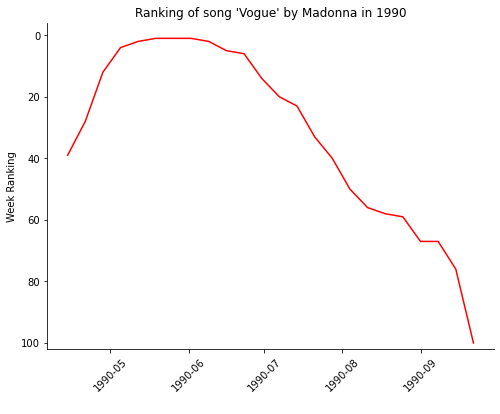

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6));
sns.lineplot(x="WeekID", y="Week Position", data=vogue, color='r')
plt.ylim(102, vogue['Week Position'].min()-5);
plt.xticks(rotation=45);
plt.xlabel(" ")
plt.ylabel("Week Ranking")
plt.title("Ranking of song 'Vogue' by Madonna in 1990")
sns.despine();


We can check aslo the rankings of several songs from a same singer. Let's try with Lady Gaga

In [42]:
lady = charts[charts['Singer'] == 'Lady Gaga'].sort_values('WeekID', ascending=True)

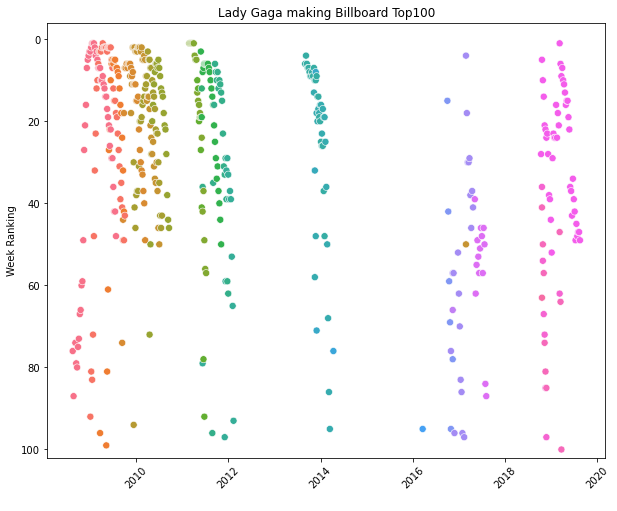

In [45]:
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x="WeekID", y="Week Position", hue='Song', data=lady, s=50)
plt.ylim(102, lady['Week Position'].min()-5);
plt.xticks(rotation=45);
plt.xlabel(" ")
plt.ylabel("Week Ranking")
ax.get_legend().remove()
plt.title("Lady Gaga making Billboard Top100");

# 2. Analisis of Ranking and No1 songs

## 2.1 Top100 Analisis

### 2.1.1 General analisis

First of all, let's check how many songs and how many artists made up to the Top100 each decades

In [47]:
song_per_decade = pd.DataFrame(charts.groupby('Decade')['SongID'].nunique())
performer_per_decade = pd.DataFrame(charts.groupby('Decade')['Singer ID'].nunique())

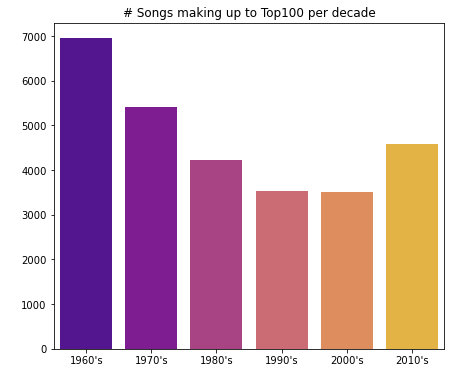

In [52]:
plt.figure(figsize=(7,6));
sns.barplot(x=song_per_decade.index, y=song_per_decade['SongID'], palette="plasma");
plt.title("# Songs making up to Top100 per decade")
plt.xlabel(" ")
plt.ylabel(" ");

Interesting evolution. Unexpectedly 2010's decade seems less competitive than the 90's and the 2000's

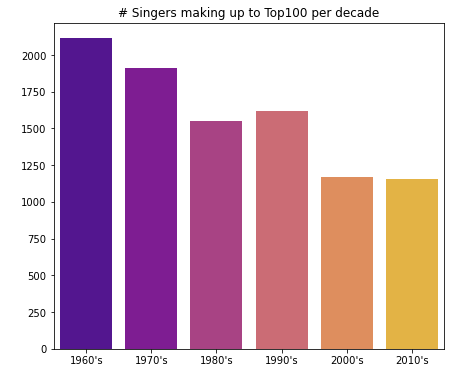

In [53]:
plt.figure(figsize=(7,6));
sns.barplot(x=performer_per_decade.index, y=performer_per_decade['Singer ID'], palette="plasma");
plt.title("# Singers making up to Top100 per decade")
plt.xlabel(" ")
plt.ylabel(" ");

But this is not reflected at Singers' level. Strong trend in having less and less artists making up to Top100.

Let's check the ratio

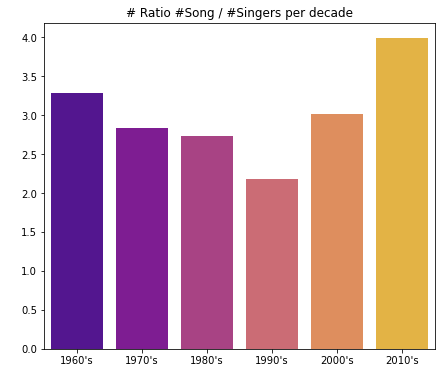

In [54]:
ratio = pd.merge(song_per_decade, performer_per_decade,left_index=True, right_index=True)
ratio['Ratio'] = ratio['SongID'] / ratio['Singer ID']

plt.figure(figsize=(7,6));
sns.barplot(x=ratio.index, y=ratio['Ratio'], palette="plasma");
plt.title("# Ratio #Song / #Singers per decade")
plt.xlabel(" ")
plt.ylabel(" ");

It means an artist put much more songs in Top100 in the last decade. Just like in the 60's !

### 2.1.2 Analisis per singer

Let's see which singers put the most on Top100 over the period and per decade

In [58]:
first_singers = pd.DataFrame(charts.groupby('Singer')['SongID'].nunique().sort_values(ascending=False).head(25))
first_singers.reset_index(inplace=True)
first_singers.rename(columns={'SongID' : 'Count'}, inplace=True)

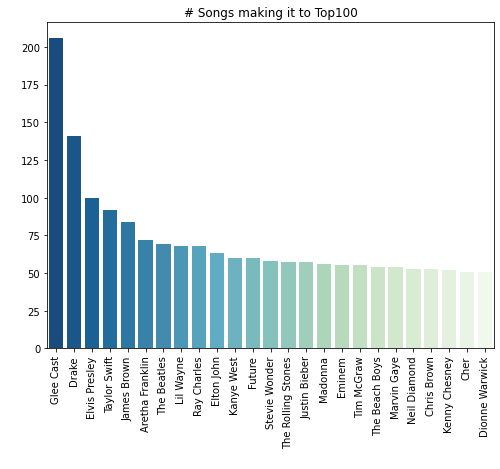

In [59]:
plt.figure(figsize=(8,6));
sns.barplot(first_singers['Singer'], first_singers['Count'], palette="GnBu_r")
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("# Songs making it to Top100");

it is quite funny to see that artists from the 60's and the 70's (Elvis Presley, James Brown, Aretha Franklin) share the top10 podium of this list with artists from the 2000 & 2010's. (Drake, Taylor Swift, Lil Wayne)

In [60]:
first_per_decade = pd.DataFrame(charts.groupby(['Decade','Singer'])['SongID'].nunique())
first_per_decade.reset_index(inplace=True)

In [61]:
first_per_decade_1960 = first_per_decade[first_per_decade['Decade'] == "1960's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_1970 = first_per_decade[first_per_decade['Decade'] == "1970's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_1980 = first_per_decade[first_per_decade['Decade'] == "1980's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_1990 = first_per_decade[first_per_decade['Decade'] == "1990's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_2000 = first_per_decade[first_per_decade['Decade'] == "2000's"].sort_values('SongID', ascending = False).head(5)
first_per_decade_2010 = first_per_decade[first_per_decade['Decade'] == "2010's"].sort_values('SongID', ascending = False).head(5)

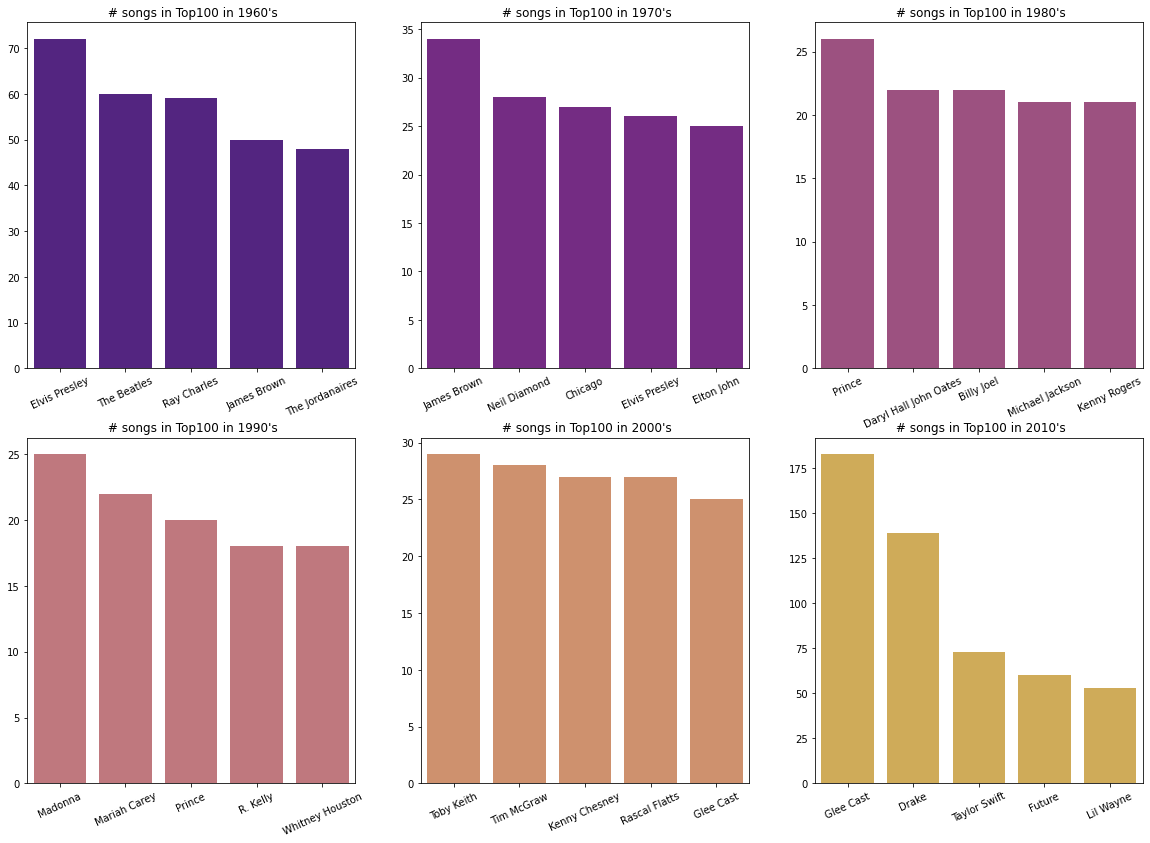

In [64]:
f, axes = plt.subplots(2, 3, figsize=(20,14))

ax1 = sns.barplot(first_per_decade_1960["Singer"] , first_per_decade_1960["SongID"], color="#53168F", ax=axes[0, 0])
ax1.set_title(" # songs in Top100 in 1960's")
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=25)

ax2 = sns.barplot(first_per_decade_1970["Singer"] , first_per_decade_1970["SongID"], color="#7E1D91", ax=axes[0, 1])
ax2.set_title(" # songs in Top100 in 1970's")
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25)

ax3 = sns.barplot(first_per_decade_1980["Singer"] , first_per_decade_1980["SongID"], color="#A84484", ax=axes[0, 2])
ax3.set_title(" # songs in Top100 in 1980's")
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=25)

ax4 = sns.barplot(first_per_decade_1990["Singer"] , first_per_decade_1990["SongID"], color="#CB6C74", ax=axes[1, 0]);
ax4.set_title(" # songs in Top100 in 1990's")
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=25)

ax5 = sns.barplot(first_per_decade_2000["Singer"] , first_per_decade_2000["SongID"], color="#DE8D5E", ax=axes[1, 1]);
ax5.set_title(" # songs in Top100 in 2000's")
ax5.set_xlabel('')
ax5.set_ylabel('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=25)

ax6 = sns.barplot(first_per_decade_2010["Singer"] , first_per_decade_2010["SongID"], color="#E3B345", ax=axes[1, 2]);
ax6.set_title(" # songs in Top100 in 2010's")
ax6.set_xlabel('')
ax6.set_ylabel('')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=25);

### 2.1.3 Analisis of Duets and Featurings

In [72]:
collab_df = pd.DataFrame(charts.groupby(['Decade','Collaboration'])['SongID'].nunique())
collab_df.reset_index(inplace=True)

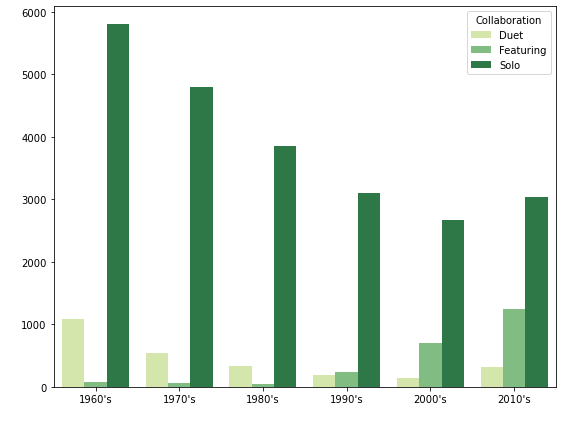

In [103]:
plt.figure(figsize=(9,7))

sns.barplot(data=collab_df,
           x='Decade',
           y='SongID',
           hue='Collaboration',
           palette='YlGn');
plt.ylabel(" ");
plt.xlabel(" ");

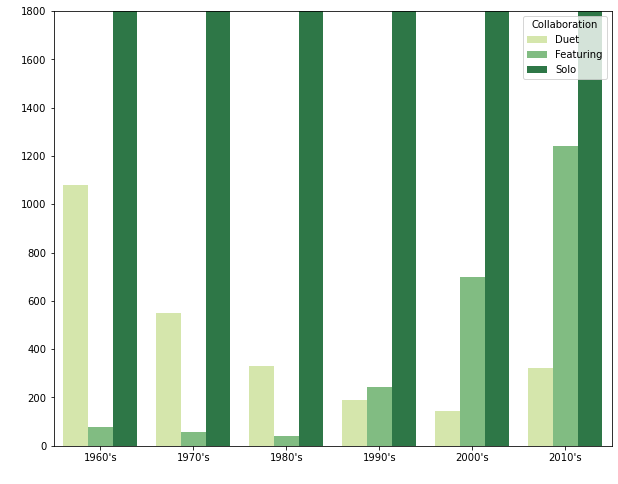

In [104]:
plt.figure(figsize=(10,8))

plt.ylim(0,1800)

sns.barplot(data=collab_df,
           x='Decade',
           y='SongID',
           hue='Collaboration',
           palette='YlGn');
plt.ylabel(" ");
plt.xlabel(" ");

In [79]:
new_collab = collab_df.groupby(['Decade', 'Collaboration'])['SongID'].aggregate('sum').unstack()

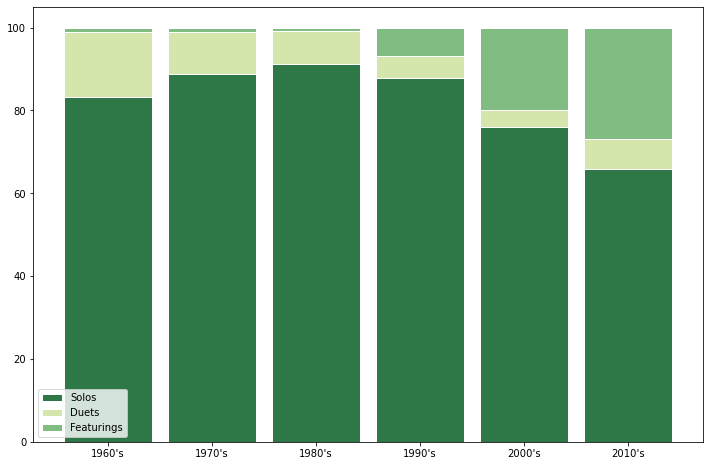

In [82]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

plt.figure(figsize=(12,8))

# Data
r = [0,1,2,3,4,5]


# From raw value to percentage
totals = [i+j+k for i,j,k in zip(new_collab['Solo'], new_collab['Duet'], new_collab['Featuring'])]
solos = [i / j * 100 for i,j in zip(new_collab['Solo'], totals)]
duets = [i / j * 100 for i,j in zip(new_collab['Duet'], totals)]
featurings = [i / j * 100 for i,j in zip(new_collab['Featuring'], totals)]
 
# plot
barWidth = 0.85
names = new_collab.index

# Create green Bars
plt.bar(r, solos, color='#2E7847', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, duets, bottom=solos, color='#D4E6AC', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, featurings, bottom=[i+j for i,j in zip(solos, duets)], color='#81BC82', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)

plt.legend(['Solos', 'Duets', 'Featurings'], loc='lower left')

# Show graphic
plt.show()
 



In the 2000's and 2010's, let's check which main singer made the most featuring, and which artist has been the most featured artists

In [83]:
feat_singers = charts[(charts['Collaboration'] == 'Featuring') 
               & ((charts['Decade'] == "2010's") 
                  | (charts['Decade'] == "2000's"))][['Singer','SongID']].drop_duplicates()
feat_singers['Singer'].value_counts().head(10)

Drake           39
Lil Wayne       34
DJ Khaled       31
Kanye West      24
Meek Mill       24
Glee Cast       23
Chris Brown     21
Pitbull         21
Eminem          18
David Guetta    17
Name: Singer, dtype: int64

In [84]:
feat_artists = charts[(charts['Collaboration'] == 'Featuring') 
               & ((charts['Decade'] == "2010's") 
                  | (charts['Decade'] == "2000's"))][['Featured Singers','SongID']].drop_duplicates()
feat_artists['Featured Singers'].value_counts().head(10)

Lil Wayne       57
Drake           53
Nicki Minaj     45
Chris Brown     37
Kanye West      29
T-Pain          22
Ludacris        20
Future          20
Snoop Dogg      15
Travis Scott    15
Name: Featured Singers, dtype: int64

In [ ]:
data <- data.frame(
  x = rnorm(1000), 
  y = rnorm(1000, mean=2)
)
 
data %>% 
  ggplot( aes(x) ) + 
    geom_histogram( aes(x = x, y = ..density..), binwidth = diff(range(data$x))/30, fill="#69b3a2" ) + 
    geom_label( aes(x=4.8, y=0.25, label="variable1"), color="#69b3a2") +
    geom_histogram( aes(x = y, y = -..density..), binwidth = diff(range(data$x))/30, fill= "#404080") +
    geom_label( aes(x=4.8, y=-0.25, label="variable2"), color="#404080") +
    theme_ipsum() +
    xlab("value of x")

In [87]:
charts[charts['Featured Singers'].notnull()]

,WeekID,Week Position,Song,Performer,SongID,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Collaboration,Singer,Featured Singers,Singer ID
976,2016-08-06,17,Make Me...,Britney Spears Featuring G-Eazy,Make Me...Britney Spears Featuring G-Eazy,NaN,17,1,2016,2010's,Featuring,Britney Spears,G-Eazy,2
977,2003-10-25,50,Me Against The Music,Britney Spears Featuring Madonna,Me Against The MusicBritney Spears Featuring M...,NaN,50,1,2003,2000's,Featuring,Britney Spears,Madonna,2
1031,2016-12-10,86,Slumber Party,Britney Spears Featuring Tinashe,Slumber PartyBritney Spears Featuring Tinashe,NaN,86,1,2016,2010's,Featuring,Britney Spears,Tinashe,2
1063,2011-03-19,20,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,NaN,20,1,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1064,2011-03-26,9,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,20.0,9,2,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308351,2008-08-02,24,What You Got,Colby O'Donis Featuring Akon,What You GotColby O'Donis Featuring Akon,22.0,14,21,2008,2000's,Featuring,Colby O'Donis,Akon,6486
308352,2008-08-09,25,What You Got,Colby O'Donis Featuring Akon,What You GotColby O'Donis Featuring Akon,24.0,14,22,2008,2000's,Featuring,Colby O'Donis,Akon,6486
308353,2008-08-16,35,What You Got,Colby O'Donis Featuring Akon,What You GotColby O'Donis Featuring Akon,25.0,14,23,2008,2000's,Featuring,Colby O'Donis,Akon,6486
308354,2008-08-23,40,What You Got,Colby O'Donis Featuring Akon,What You GotColby O'Donis Featuring Akon,35.0,14,24,2008,2000's,Featuring,Colby O'Donis,Akon,6486


In [88]:
charts[charts['Song'] == 'Till The World Ends']

,WeekID,Week Position,Song,Performer,SongID,Previous Week Position,Peak Position,Weeks on Chart,Year,Decade,Collaboration,Singer,Featured Singers,Singer ID
1063,2011-03-19,20,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,NaN,20,1,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1064,2011-03-26,9,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,20.0,9,2,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1065,2011-04-02,23,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,9.0,9,3,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1066,2011-04-09,22,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,23.0,9,4,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1067,2011-04-16,13,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,22.0,9,5,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1068,2011-04-23,8,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,13.0,8,6,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1069,2011-04-30,9,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,8.0,8,7,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1070,2011-05-07,11,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,9.0,8,8,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1071,2011-05-14,3,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,11.0,3,9,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2
1072,2011-05-21,6,Till The World Ends,Britney Spears Featuring Nicki Minaj & Ke$ha,Till The World EndsBritney Spears Featuring Ni...,3.0,3,10,2011,2010's,Featuring,Britney Spears,Nicki Minaj,2


### 2.1.4 Billboard Duration Analisis

Let's check now how many weeks a song stays in the Top100, in average, per year and per decade

In [159]:
week_average = pd.DataFrame(charts.groupby(['Year','SongID'])['Weeks on Chart'].max())
week_average.columns = ['Weeks on chart max']
week_average = week_average.reset_index()
week_average = pd.DataFrame(week_average.groupby('Year')['Weeks on chart max'].mean())
week_average.head()

,Weeks on chart max
Year,
1960,8.455714
1961,7.445443
1962,7.731771
1963,7.554377
1964,7.057953


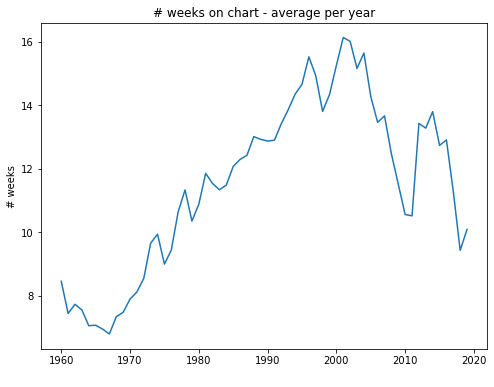

In [160]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average)
plt.xlabel(" ")
plt.ylabel("# weeks")
plt.title("# weeks on chart - average per year");

Let's focus now on Top1. A few statistics first

In [161]:
charts[charts['Peak Position'] == 1]['SongID'].nunique()

1076

1095 songs made up to No1 in all music history

In [162]:
charts['SongID'].nunique()
charts[charts['Peak Position'] == 1]['SongID'].nunique() / charts['SongID'].nunique() * 100

3.890797324172844

Which means about 4% of the songs

In [163]:
charts[charts['Peak Position'] == 1]['Singer ID'].nunique()

696

About 713 singers made up to the No1 position. Let's check with artists did the most as No1

In [241]:
charts[charts['Peak Position'] == 1].groupby('Singer')['SongID'].nunique().sort_values(ascending=False).head(10)

Singer
The Beatles        20
Mariah Carey       19
Michael Jackson    13
The Supremes       12
Madonna            12
Whitney Houston    11
Rihanna            11
Bee Gees            9
Usher               9
Katy Perry          9
Name: SongID, dtype: int64

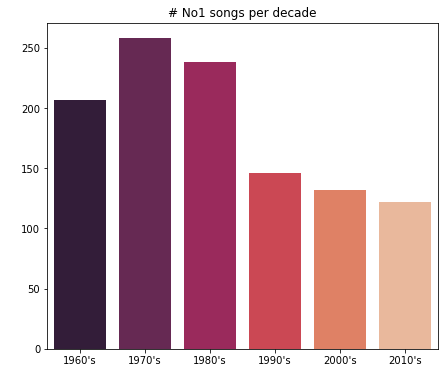

In [246]:
#charts[charts['Peak Position'] == 1].groupby('Decade')['SongID'].nunique()
plt.figure(figsize=(7,6));
sns.barplot(charts[charts['Peak Position'] == 1].groupby('Decade')['SongID'].nunique().index, charts[charts['Peak Position'] == 1].groupby('Decade')['SongID'].nunique(), palette="rocket");
plt.title("# No1 songs per decade")
plt.xlabel(" ")
plt.ylabel(" ");

In [256]:
charts[charts['Peak Position'] == 1].groupby('Year')['SongID'].nunique()

Year
1960    23
1961    23
1962    23
1963    23
1964    25
1965    29
1966    30
1967    22
1968    18
1969    19
1970    26
1971    22
1972    25
1973    31
1974    40
1975    41
1976    30
1977    31
1978    21
1979    28
1980    23
1981    21
1982    19
1983    21
1984    23
1985    31
1986    38
1987    36
1988    38
1989    42
1990    31
1991    33
1992    17
1993    13
1994    13
1995    14
1996    15
1997    13
1998    20
1999    21
2000    20
2001    18
2002    12
2003    14
2004    15
2005    12
2006    22
2007    22
2008    19
2009    19
2010    23
2011    22
2012    18
2013    16
2014    14
2015    12
2016    16
2017    15
2018    18
2019    19
Name: SongID, dtype: int64

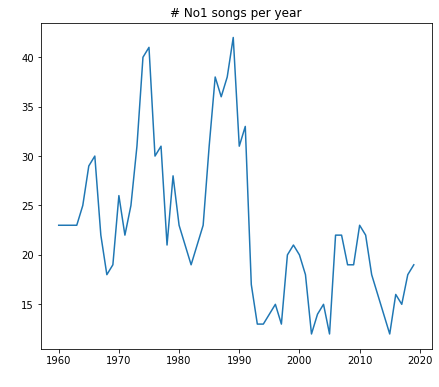

In [249]:

plt.figure(figsize=(7,6));
sns.lineplot(charts[charts['Peak Position'] == 1].groupby('Year')['SongID'].nunique().index, charts[charts['Peak Position'] == 1].groupby('Year')['SongID'].nunique(), palette="rocket");
plt.title("# No1 songs per year")
plt.xlabel(" ")
plt.ylabel(" ");

In [166]:
top=pd.DataFrame(charts[charts['Peak Position'] == 1].groupby('Singer')['SongID'].nunique().sort_values(ascending=False).head(10))
top.reset_index(inplace=True)

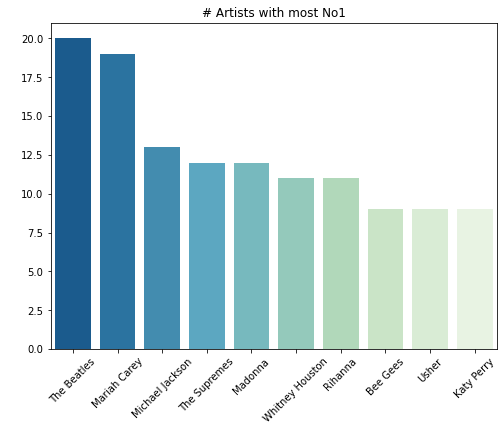

In [167]:
plt.figure(figsize=(8,6));
sns.barplot(top['Singer'], top['SongID'], palette="GnBu_r")
plt.xticks(rotation=45)
plt.xlabel(" ")
plt.ylabel(" ")
plt.title("# Artists with most No1");

In [168]:
no1_decade=pd.DataFrame(charts[charts['Peak Position'] == 1].groupby('Decade')['SongID'].nunique())
no1_decade.reset_index(inplace=True)

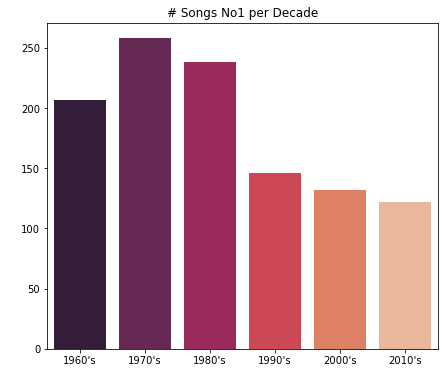

In [169]:
plt.figure(figsize=(7,6));
sns.barplot(x='Decade',y='SongID', data=no1_decade, palette="rocket");
plt.title("# Songs No1 per Decade")
plt.xlabel(" ")
plt.ylabel(" ");

Much more No1 in the 70's and the 80's despite making less songs in the top100 than others decades

I would be interesting to see what has been the first position a future No1 song entered the top100, to understand whether or not it gets quicker now with social medias and streaming platforms

In [170]:
songsNo1 = charts[charts['Peak Position'] == 1]['SongID'].drop_duplicates()

In [171]:
songsNo1 = charts[charts['SongID'].isin(songsNo1)][['SongID','Previous Week Position','Week Position', 'Weeks on Chart','Decade', 'Year']]

In [172]:
songsNo1_2 = songsNo1[songsNo1['Previous Week Position'].isnull()]

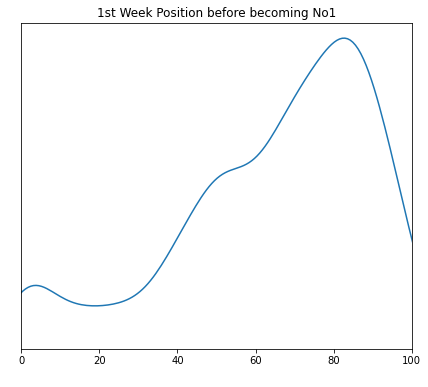

In [173]:
plt.figure(figsize=(7,6));
sns.kdeplot(data=songsNo1_2, x="Week Position")
plt.xlim(0,100)
plt.title('1st Week Position before becoming No1')
plt.yticks([])
plt.ylabel(' ')
plt.xlabel(' ');

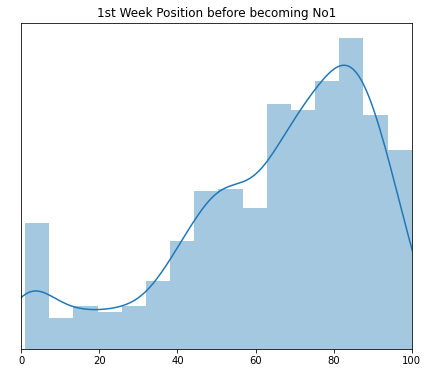

In [174]:
plt.figure(figsize=(7,6));
sns.distplot(x=songsNo1_2["Week Position"])
plt.xlim(0,100)
plt.xlabel('1st Week Position before becoming No1')
plt.title('1st Week Position before becoming No1')
plt.yticks([])
plt.ylabel(' ')
plt.xlabel(' ');

In [175]:
songsNo1_1960 = songsNo1_2[songsNo1_2['Decade'] == "1960's"]
songsNo1_1970 = songsNo1_2[songsNo1_2['Decade'] == "1970's"]
songsNo1_1980 = songsNo1_2[songsNo1_2['Decade'] == "1980's"]
songsNo1_1990 = songsNo1_2[songsNo1_2['Decade'] == "1990's"]
songsNo1_2000 = songsNo1_2[songsNo1_2['Decade'] == "2000's"]
songsNo1_2010 = songsNo1_2[songsNo1_2['Decade'] == "2010's"]

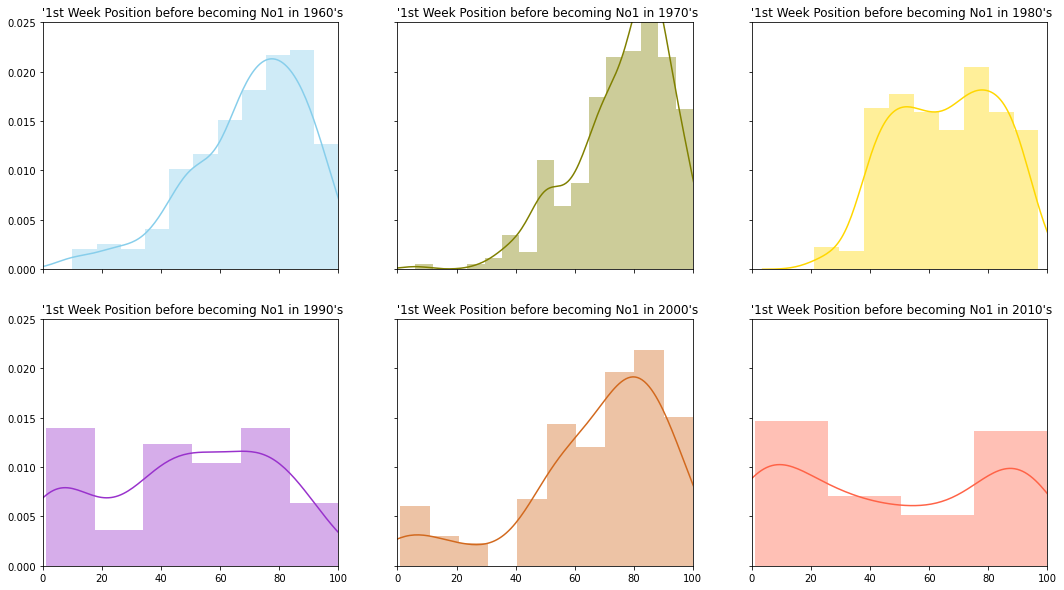

In [176]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

plt.xlim(0,100)
plt.ylim(0,0.025)

ax1 = sns.distplot(songsNo1_1960["Week Position"] , color="skyblue", ax=axes[0, 0])
ax2= sns.distplot(songsNo1_1970["Week Position"] , color="olive", ax=axes[0, 1])
ax3 = sns.distplot(songsNo1_1980["Week Position"] , color="gold", ax=axes[0, 2])
ax4= sns.distplot(songsNo1_1990["Week Position"] , color="darkorchid", ax=axes[1, 0]);
ax5 = sns.distplot(songsNo1_2000["Week Position"] , color="chocolate", ax=axes[1, 1]);
ax6 = sns.distplot(songsNo1_2010["Week Position"] , color="tomato", ax=axes[1, 2]);

ax1.set_title(" '1st Week Position before becoming No1 in 1960's")
ax2.set_title(" '1st Week Position before becoming No1 in 1970's")
ax3.set_title(" '1st Week Position before becoming No1 in 1980's")
ax4.set_title(" '1st Week Position before becoming No1 in 1990's")
ax5.set_title(" '1st Week Position before becoming No1 in 2000's")
ax6.set_title(" '1st Week Position before becoming No1 in 2010's")
ax4.set_xlabel('')
ax1.set_ylabel('')
ax5.set_xlabel('')
ax6.set_xlabel('')
ax4.set_ylabel('');

How many weeks are needed in average to get No1 ?

In [177]:
songsNo1.sort_values(['SongID','Weeks on Chart'])

,SongID,Previous Week Position,Week Position,Weeks on Chart,Decade,Year
128961,(Can't Live Without Your) Love And AffectionNe...,NaN,93,1,1990's,1990
128984,(Can't Live Without Your) Love And AffectionNe...,93.0,80,2,1990's,1990
128994,(Can't Live Without Your) Love And AffectionNe...,80.0,63,3,1990's,1990
129004,(Can't Live Without Your) Love And AffectionNe...,63.0,54,4,1990's,1990
129009,(Can't Live Without Your) Love And AffectionNe...,54.0,43,5,1990's,1990
...,...,...,...,...,...,...
241487,You've Lost That Lovin' Feelin'The Righteous B...,2.0,2,12,1960's,1965
241488,You've Lost That Lovin' Feelin'The Righteous B...,2.0,3,13,1960's,1965
241489,You've Lost That Lovin' Feelin'The Righteous B...,3.0,12,14,1960's,1965
241490,You've Lost That Lovin' Feelin'The Righteous B...,12.0,15,15,1960's,1965


In [178]:
how_long = songsNo1[songsNo1['Week Position'] == 1][['SongID','Weeks on Chart', 'Decade']]
how_long.groupby('SongID')['Weeks on Chart'].min()

SongID
(Can't Live Without Your) Love And AffectionNelson                           13
(Everything I Do) I Do It For YouBryan Adams                                  5
(Hey Won't You Play) Another Somebody Done Somebody Wrong SongB.J. Thomas    13
(I Can't Get No) SatisfactionThe Rolling Stones                               5
(I Just) Died In Your ArmsCutting Crew                                        9
                                                                             ..
You're SixteenRingo Starr                                                     7
You're So VainCarly Simon                                                     6
You're The One That I WantJohn Travolta & Olivia Newton-John                 11
You've Got A FriendJames Taylor                                               9
You've Lost That Lovin' Feelin'The Righteous Brothers                         9
Name: Weeks on Chart, Length: 1072, dtype: int64

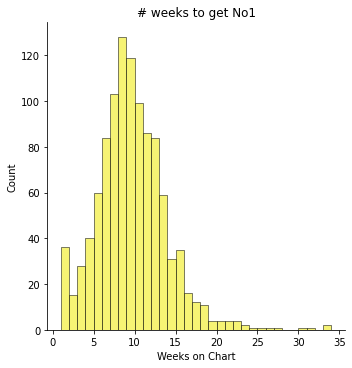

In [179]:
sns.displot(how_long.groupby('SongID')['Weeks on Chart'].min(), binwidth=1, color='#F3F046', linewidth=0.5)
plt.title('# weeks to get No1');

In [180]:
how_long_1960 = how_long[how_long['Decade'] == "1960's"].groupby('SongID')['Weeks on Chart'].min()
how_long_1970 = how_long[how_long['Decade'] == "1970's"].groupby('SongID')['Weeks on Chart'].min()
how_long_1980 = how_long[how_long['Decade'] == "1980's"].groupby('SongID')['Weeks on Chart'].min()
how_long_1990 = how_long[how_long['Decade'] == "1990's"].groupby('SongID')['Weeks on Chart'].min()
how_long_2000 = how_long[how_long['Decade'] == "2000's"].groupby('SongID')['Weeks on Chart'].min()
how_long_2010 = how_long[how_long['Decade'] == "2010's"].groupby('SongID')['Weeks on Chart'].min()

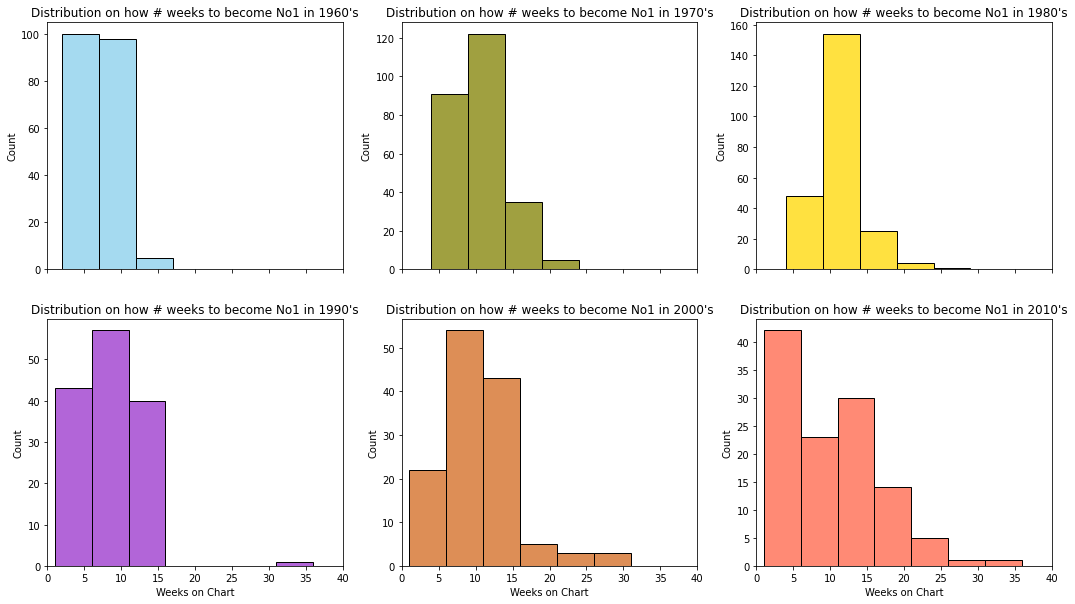

In [181]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True)

plt.xlim(0,40)

ax1 = sns.histplot(how_long_1960 , color="skyblue", ax=axes[0, 0], binwidth=5)
ax2 = sns.histplot(how_long_1970 , color="olive", ax=axes[0, 1], binwidth=5)
ax3 = sns.histplot(how_long_1980 , color="gold", ax=axes[0, 2], binwidth=5)
ax4 = sns.histplot(how_long_1990 , color="darkorchid", ax=axes[1, 0], binwidth=5);
ax5 = sns.histplot(how_long_2000 , color="chocolate", ax=axes[1, 1], binwidth=5);
ax6 = sns.histplot(how_long_2010 , color="tomato", ax=axes[1, 2], binwidth=5);

ax1.set_title("Distribution on how # weeks to become No1 in 1960's")
ax2.set_title("Distribution on how # weeks to become No1 in 1970's")
ax3.set_title("Distribution on how # weeks to become No1 in 1980's")
ax4.set_title("Distribution on how # weeks to become No1 in 1990's")
ax5.set_title("Distribution on how # weeks to become No1 in 2000's")
ax6.set_title("Distribution on how # weeks to become No1 in 2010's");

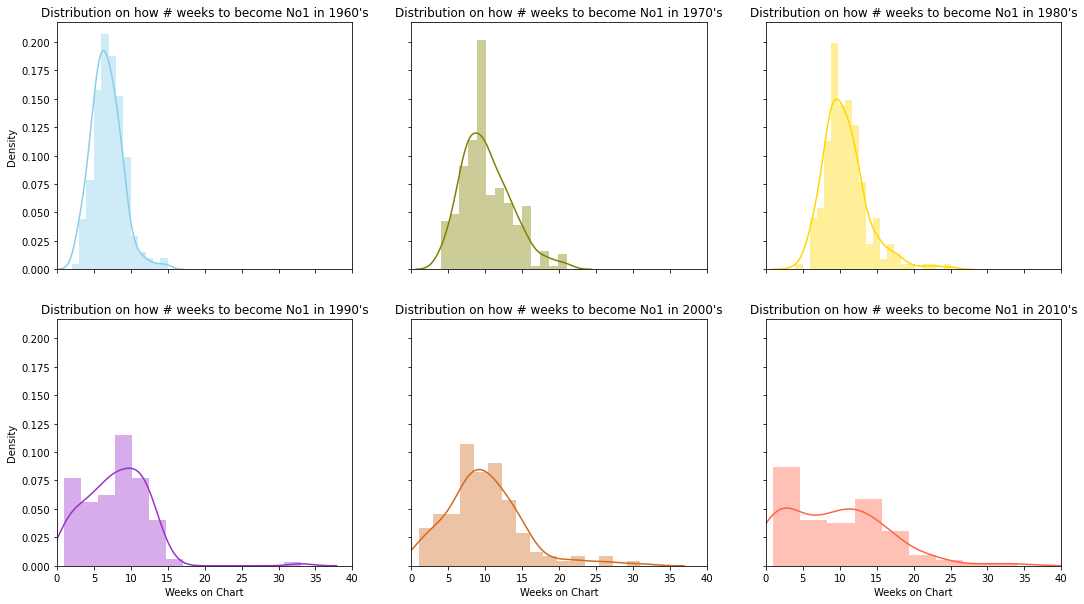

In [258]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

plt.xlim(0,40)

ax1 = sns.distplot(how_long_1960 , color="skyblue", ax=axes[0, 0])
ax2 = sns.distplot(how_long_1970 , color="olive", ax=axes[0, 1])
ax3 = sns.distplot(how_long_1980 , color="gold", ax=axes[0, 2])
ax4 = sns.distplot(how_long_1990 , color="darkorchid", ax=axes[1, 0]);
ax5 = sns.distplot(how_long_2000 , color="chocolate", ax=axes[1, 1]);
ax6 = sns.distplot(how_long_2010 , color="tomato", ax=axes[1, 2]);

ax1.set_title("Distribution on how # weeks to become No1 in 1960's")
ax2.set_title("Distribution on how # weeks to become No1 in 1970's")
ax3.set_title("Distribution on how # weeks to become No1 in 1980's")
ax4.set_title("Distribution on how # weeks to become No1 in 1990's")
ax5.set_title("Distribution on how # weeks to become No1 in 2000's")
ax6.set_title("Distribution on how # weeks to become No1 in 2010's");

While before you get No1 between 2 and 10 weeks, modern times statistics show it may take longer now to get No1 (a lot of songs get No1 after 10 weeks in the charts)

For No1 songs, let's see how long in average they stayed in the Top100 and how long they stayed as No1

In [182]:
No1_week = pd.DataFrame(songsNo1.groupby(['SongID','Decade'], as_index=False)['Weeks on Chart'].max())
No1_week

,SongID,Decade,Weeks on Chart
0,(Can't Live Without Your) Love And AffectionNe...,1990's,26
1,(Everything I Do) I Do It For YouBryan Adams,1990's,22
2,(Hey Won't You Play) Another Somebody Done Som...,1970's,18
3,(I Can't Get No) SatisfactionThe Rolling Stones,1960's,14
4,(I Just) Died In Your ArmsCutting Crew,1980's,19
...,...,...,...
1130,You're SixteenRingo Starr,1970's,15
1131,You're So VainCarly Simon,1970's,17
1132,You're The One That I WantJohn Travolta & Oliv...,1970's,24
1133,You've Got A FriendJames Taylor,1970's,14


Text(0.5, 1.0, '# weeks a No1 song stays in the Top100')

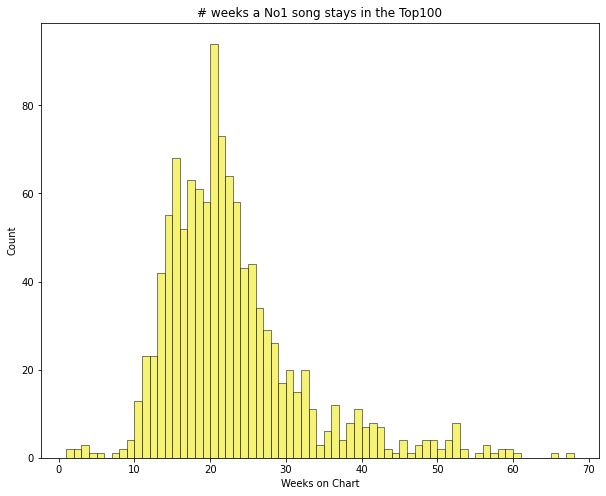

In [183]:
plt.figure(figsize=(10,8))
sns.histplot(No1_week['Weeks on Chart'], binwidth=1, color='#F3F046', linewidth=0.5)
plt.title('# weeks a No1 song stays in the Top100')

In [184]:
No1_week_1960 = No1_week[No1_week['Decade'] == "1960's"]
No1_week_1970 = No1_week[No1_week['Decade'] == "1970's"]
No1_week_1980 = No1_week[No1_week['Decade'] == "1980's"]
No1_week_1990 = No1_week[No1_week['Decade'] == "1990's"]
No1_week_2000 = No1_week[No1_week['Decade'] == "2000's"]
No1_week_2010 = No1_week[No1_week['Decade'] == "2010's"]

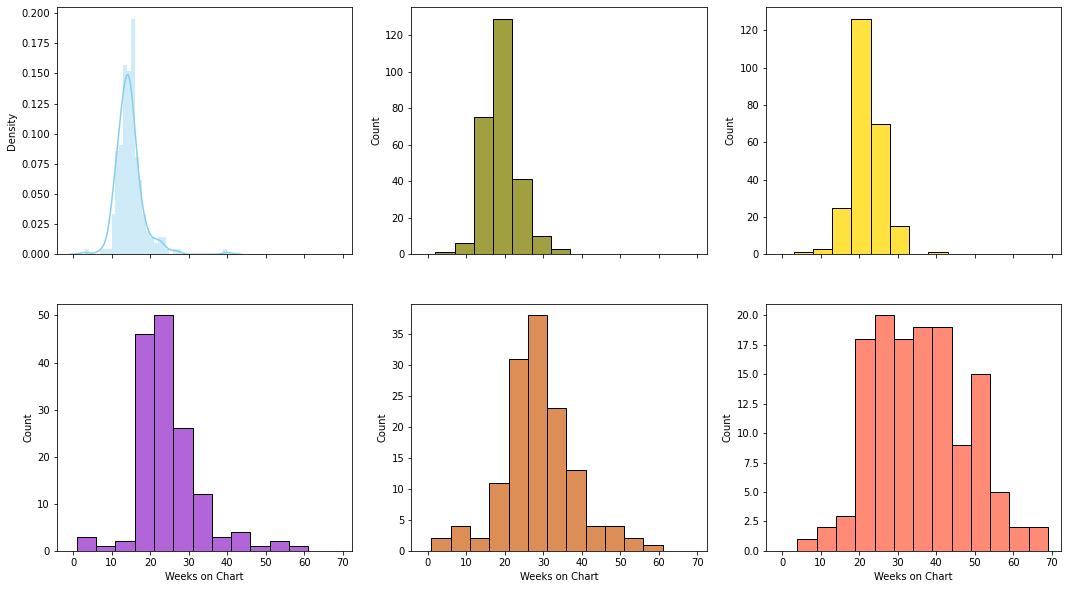

In [251]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True)

sns.histplot(No1_week_1960["Weeks on Chart"] , color="skyblue", ax=axes[0, 0])
sns.histplot(No1_week_1970["Weeks on Chart"] , color="olive", ax=axes[0, 1], binwidth=5)
sns.histplot(No1_week_1980["Weeks on Chart"] , color="gold", ax=axes[0, 2], binwidth=5)
sns.histplot(No1_week_1990["Weeks on Chart"] , color="darkorchid", ax=axes[1, 0], binwidth=5);
sns.histplot(No1_week_2000["Weeks on Chart"] , color="chocolate", ax=axes[1, 1], binwidth=5);
sns.histplot(No1_week_2010["Weeks on Chart"] , color="tomato", ax=axes[1, 2], binwidth=5);

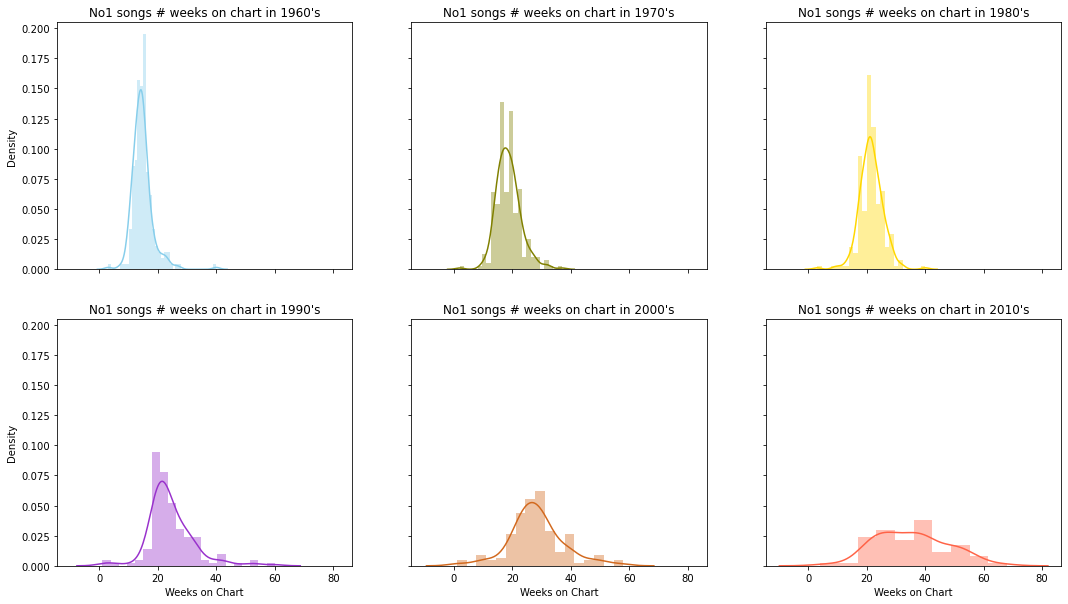

In [254]:
f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True, sharey=True)

ax1 = sns.distplot(No1_week_1960["Weeks on Chart"] , color="skyblue", ax=axes[0, 0])
ax2 = sns.distplot(No1_week_1970["Weeks on Chart"] , color="olive", ax=axes[0, 1])
ax3 = sns.distplot(No1_week_1980["Weeks on Chart"] , color="gold", ax=axes[0, 2])
ax4 = sns.distplot(No1_week_1990["Weeks on Chart"] , color="darkorchid", ax=axes[1, 0]);
ax5 = sns.distplot(No1_week_2000["Weeks on Chart"] , color="chocolate", ax=axes[1, 1]);
ax6 = sns.distplot(No1_week_2010["Weeks on Chart"] , color="tomato", ax=axes[1, 2]);

ax1.set_title("No1 songs # weeks on chart in 1960's")
ax2.set_title("No1 songs # weeks on chart in 1970's")
ax3.set_title("No1 songs # weeks on chart in 1980's")
ax4.set_title("No1 songs # weeks on chart in 1990's")
ax5.set_title("No1 songs # weeks on chart in 2000's")
ax6.set_title("No1 songs # weeks on chart in 2010's");

Interesting to see that songs in the 2010's tend to stay much more on the charts than in the 60's. A strong trend there !

Same study but let's check how long songs stay as No1

In [186]:
songsNo1[songsNo1['Week Position'] == 1].groupby('Decade')['SongID'].value_counts()

Decade  SongID                                                      
1960's  Are You Lonesome To-night?Elvis Presley With The Jordanaires    12
        In The Year 2525Zager & Evans                                   12
        Get BackThe Beatles With Billy Preston                          10
        It's Now Or NeverElvis Presley With The Jordanaires             10
        Sugar ShackJimmy Gilmer And The Fireballs                       10
                                                                        ..
2010's  That's What I LikeBruno Mars                                     1
        We R Who We RKe$ha                                               1
        What Do You Mean?Justin Bieber                                   1
        What's My Name?Rihanna Featuring Drake                           1
        When I Was Your ManBruno Mars                                    1
Name: SongID, Length: 1075, dtype: int64

In [187]:
No1_weekNo1 = songsNo1[songsNo1['Week Position'] == 1]
No1_weekNo1

,SongID,Previous Week Position,Week Position,Weeks on Chart,Decade,Year
0,Candle In The Wind 1997/Something About The Wa...,NaN,1,1,1990's,1997
37,Candle In The Wind 1997/Something About The Wa...,1.0,1,12,1990's,1997
115,Candle In The Wind 1997/Something About The Wa...,1.0,1,9,1990's,1997
116,Bennie And The JetsElton John,2.0,1,9,1970's,1974
117,Crocodile RockElton John,3.0,1,9,1970's,1973
...,...,...,...,...,...,...
336106,You Don't Have To Be A Star (To Be In My Show)...,2.0,1,18,1970's,1977
337691,The HustleVan McCoy And The Soul City Symphony,2.0,1,15,1970's,1975
338106,Then Came YouDionne Warwicke & Spinners,2.0,1,14,1970's,1974
338700,Whatever Gets You Thru The NightJohn Lennon Wi...,3.0,1,8,1970's,1974


In [188]:
No1_weekNo1_1960 = No1_weekNo1[No1_weekNo1['Decade'] == "1960's"]
No1_weekNo1_1970 = No1_weekNo1[No1_weekNo1['Decade'] == "1970's"]
No1_weekNo1_1980 = No1_weekNo1[No1_weekNo1['Decade'] == "1980's"]
No1_weekNo1_1990 = No1_weekNo1[No1_weekNo1['Decade'] == "1990's"]
No1_weekNo1_2000 = No1_weekNo1[No1_weekNo1['Decade'] == "2000's"]
No1_weekNo1_2010 = No1_weekNo1[No1_weekNo1['Decade'] == "2010's"]

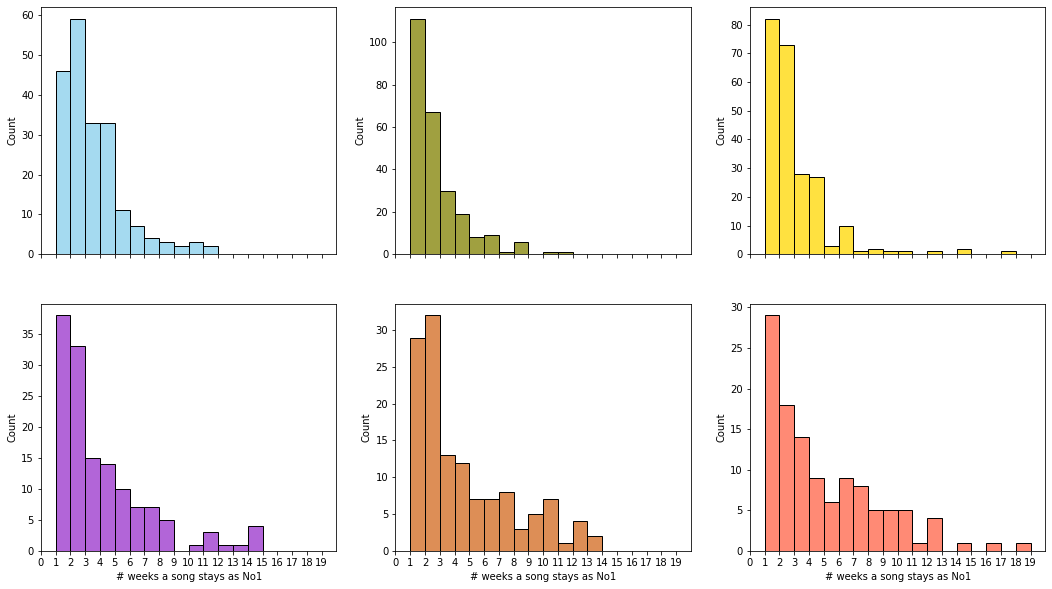

In [189]:
import numpy as np

f, axes = plt.subplots(2, 3, figsize=(18,10), sharex=True)

plt.xlim(0,20)

ax1 = sns.histplot(No1_weekNo1_1960['SongID'].value_counts() , color="skyblue", ax=axes[0, 0], binwidth=1)
ax2 = sns.histplot(No1_weekNo1_1970['SongID'].value_counts() , color="olive", ax=axes[0, 1], binwidth=1)
ax3 = sns.histplot(No1_weekNo1_1980['SongID'].value_counts() , color="gold", ax=axes[0, 2], binwidth=1)
ax4 = sns.histplot(No1_weekNo1_1990['SongID'].value_counts() , color="darkorchid", ax=axes[1, 0], binwidth=1);
ax5 = sns.histplot(No1_weekNo1_2000['SongID'].value_counts() , color="chocolate", ax=axes[1, 1], binwidth=1);
ax6 = sns.histplot(No1_weekNo1_2010['SongID'].value_counts() , color="tomato", ax=axes[1, 2], binwidth=1);

ax1.set_xlabel("# weeks a song stays as No1")
ax2.set_xlabel("# weeks a song stays as No1")
ax3.set_xlabel("# weeks a song stays as No1")
ax4.set_xlabel("# weeks a song stays as No1")
ax5.set_xlabel("# weeks a song stays as No1")
ax6.set_xlabel("# weeks a song stays as No1");

ax1.set_xticks(np.arange(20));


Nothing very specific here, songs stayed No1 in average the same way in all decades ! Maybe a bit longer since the 1990's

## Let's check the Spotify file

In [190]:
spotify= pd.read_csv('spotify_data.csv')

In [191]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [192]:
spotify['decade'] = spotify['year'].apply(decade)

In [193]:
spotify.drop(spotify[spotify['decade'] == "1950's"].index, inplace=True)

In [194]:
spotify.drop(spotify[spotify['year'] == 2020].index, inplace=True)

In [195]:
count_name = spotify[['decade','name']].drop_duplicates()

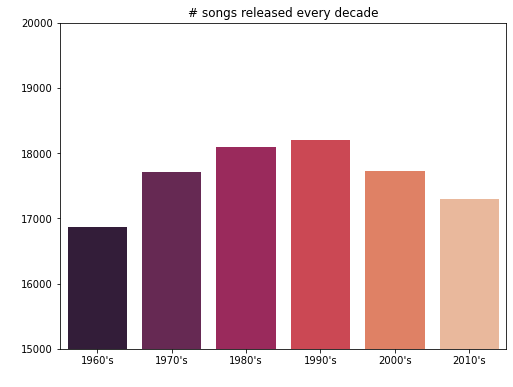

In [255]:
plt.figure(figsize=(8,6))
sns.countplot(x='decade', data=count_name, palette='rocket')
plt.xlabel(' ')
plt.ylabel(' ')
plt.ylim(15000,20000)
plt.title('# songs released every decade');

In [197]:
song_per_decade = pd.DataFrame(charts.groupby('Decade')['SongID'].nunique())
name_per_decade = pd.DataFrame(spotify.groupby('decade')['name'].nunique())

In [198]:
name_per_decade['RatioTop'] = song_per_decade['SongID'] / name_per_decade['name']
name_per_decade

,name,RatioTop
decade,,
1960's,16862,0.412407
1970's,17711,0.305121
1980's,18095,0.233269
1990's,18196,0.193779
2000's,17729,0.198319
2010's,17295,0.265742


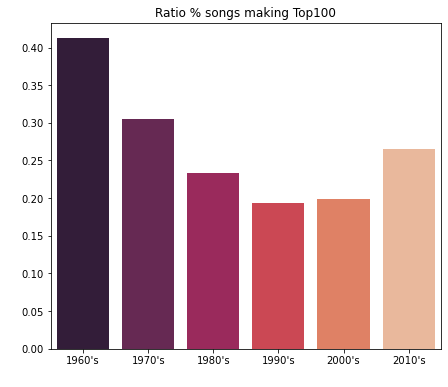

In [199]:
plt.figure(figsize=(7,6));
sns.barplot(x=name_per_decade.index, y=name_per_decade['RatioTop'], data=name_per_decade, palette="rocket");
plt.title("Ratio % songs making Top100")
plt.xlabel(" ")
plt.ylabel(" ");

From a previous research, I've seen that the Charts dataset and Spotify dataset have 12000 songs in common. Let's merge them to see the danceability, duration and tempo of Top100 songs per year or decade

In [200]:
spotify['artists'] = spotify['artists'].str.replace("[","")
spotify['artists'] = spotify['artists'].str.replace("'","")
spotify['artists'] = spotify['artists'].str.replace("]","")

In [201]:
spotify[['singer','featured singer']] = spotify['artists'].str.split(',',expand=True).iloc[:,:2]

In [202]:
spotify["concatenate"] = spotify["name"] + spotify["singer"]

In [203]:
charts['concatenate'] = charts['Song'] + charts['Singer']

In [204]:
charts = pd.merge(charts, spotify[['concatenate','danceability','duration_ms','tempo']], on='concatenate', how='left')

In [205]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385635 entries, 0 to 385634
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  385635 non-null  datetime64[ns]
 1   Song                    385635 non-null  object        
 2   SongID                  385635 non-null  object        
 3   Singer                  385635 non-null  object        
 4   Singer ID               385635 non-null  int64         
 5   Collaboration           385635 non-null  object        
 6   Featured Singers        31970 non-null   object        
 7   Peak Position           385635 non-null  int64         
 8   Week Position           385635 non-null  int64         
 9   Previous Week Position  350225 non-null  float64       
 10  Weeks on Chart          385635 non-null  int64         
 11  Year                    385635 non-null  int64         
 12  Decade                  385635

In [206]:
danceability_year = pd.merge(charts.groupby('Year')['danceability'].mean(), 
                     spotify.groupby('year')['danceability'].mean(),
                     left_index=True, right_index=True,
                     suffixes=['_top100','_all'])

duration_year = pd.merge(charts.groupby('Year')['duration_ms'].mean(), 
                     spotify.groupby('year')['duration_ms'].mean(),
                     left_index=True, right_index=True,
                     suffixes=['_top100','_all'])

tempo_year = pd.merge(charts.groupby('Year')['tempo'].mean(), 
                     spotify.groupby('year')['tempo'].mean(),
                     left_index=True, right_index=True,
                     suffixes=['_top100','_all'])


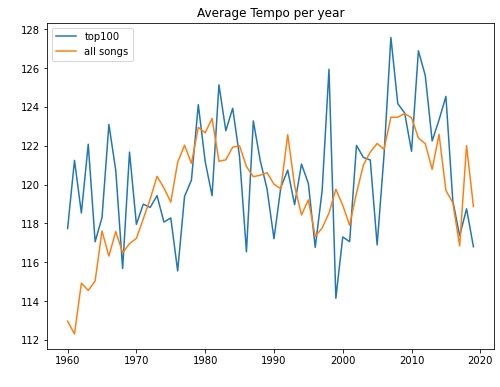

In [207]:
#tempo per year
plt.figure(figsize=(8,6))
sns.lineplot(x=tempo_year.index, y='tempo_top100', data=tempo_year)
sns.lineplot(x=tempo_year.index, y='tempo_all', data=tempo_year)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title("Average Tempo per year")
plt.legend(['top100', 'all songs']);

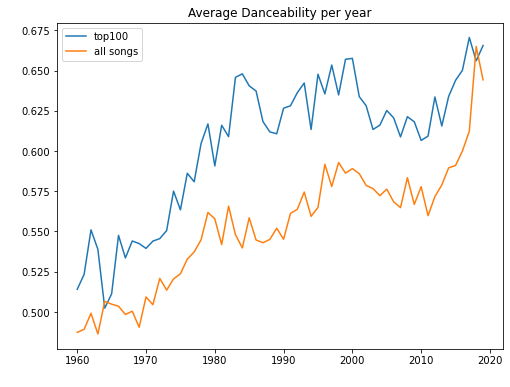

In [208]:
#danceability per year
plt.figure(figsize=(8,6))
sns.lineplot(x=danceability_year.index, y='danceability_top100', data=danceability_year)
sns.lineplot(x=danceability_year.index, y='danceability_all', data=danceability_year)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title("Average Danceability per year")
plt.legend(['top100', 'all songs']);

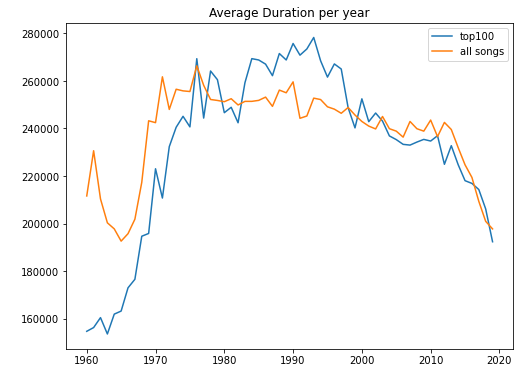

In [209]:
#duration per decade
plt.figure(figsize=(8,6))
sns.lineplot(x=duration_year.index, y='duration_ms_top100', data=duration_year)
sns.lineplot(x=duration_year.index, y='duration_ms_all', data=duration_year)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title("Average Duration per year")
plt.legend(['top100', 'all songs']);

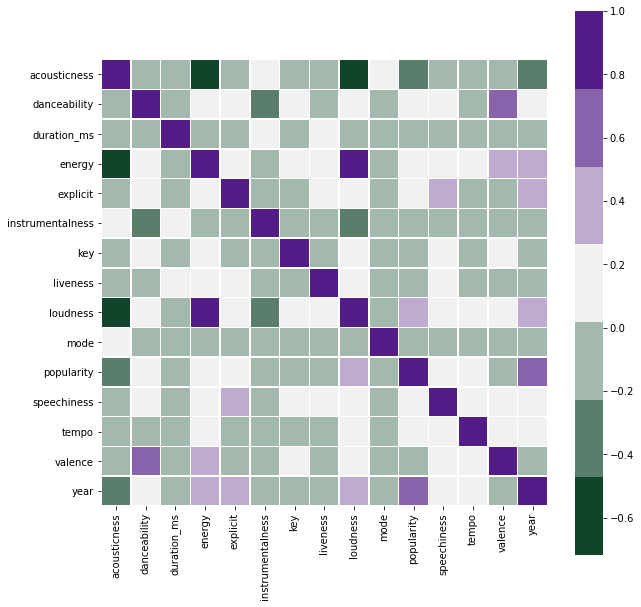

In [210]:
spotify.corr()
plt.figure(figsize=(10,10))
sns.heatmap(spotify.corr(),
           cmap=sns.diverging_palette(145,280,s=85,l=25,n=7),
           linewidths=0.5,
           square=True);

Extra questions

In [211]:
charts.sort_values('WeekID', ascending=True, inplace=True)

In [212]:
charts[charts['Performer'].str.contains('featuring')].sort_values('Year').head(50)

,WeekID,Song,SongID,Singer,Singer ID,Collaboration,Featured Singers,Peak Position,Week Position,Previous Week Position,Weeks on Chart,Year,Decade,Performer,concatenate,danceability,duration_ms,tempo
270685,1960-12-10,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,71,71,NaN,1,1960,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270692,1960-12-17,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,59,59,71.0,2,1960,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270695,1960-12-24,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,53,53,59.0,3,1960,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270696,1960-12-31,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,32,32,53.0,4,1960,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270691,1961-03-25,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,2,38,26.0,16,1961,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270690,1961-03-18,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,2,26,23.0,15,1961,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270689,1961-03-11,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,2,23,14.0,14,1961,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270688,1961-03-04,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,2,14,8.0,13,1961,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270686,1961-02-25,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,2,8,2.0,12,1961,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN
270694,1961-02-18,Shop Around,"Shop AroundThe Miracles (featuring Bill ""Smoke...","The Miracles (featuring Bill ""Smokey"" Robinson)",2175,Solo,NaN,2,2,3.0,11,1961,1960's,"The Miracles (featuring Bill ""Smokey"" Robinson)","Shop AroundThe Miracles (featuring Bill ""Smoke...",NaN,NaN,NaN


In [214]:
spotify.groupby('artists')['name'].nunique().sort_values(ascending=False).head(50)

artists
Bob Dylan                   512
The Beach Boys              442
Elvis Presley               360
The Rolling Stones          351
Queen                       348
Frank Sinatra               339
The Beatles                 331
Johnny Cash                 321
Fleetwood Mac               304
Led Zeppelin                269
Grateful Dead               243
Nina Simone                 228
Vicente Fernández           222
Bob Marley & The Wailers    218
The Who                     215
David Bowie                 207
Elton John                  205
The Kinks                   205
Metallica                   204
Stevie Wonder               201
Pink Floyd                  187
Marvin Gaye                 183
Aretha Franklin             178
Talking Heads               178
KISS                        167
U2                          165
Genesis                     165
Red Hot Chili Peppers       164
Van Morrison                163
Dean Martin                 161
Willie Nelson               160


In [215]:
charts[charts['Performer'] == 'Tobby Keith']

,WeekID,Song,SongID,Singer,Singer ID,Collaboration,Featured Singers,Peak Position,Week Position,Previous Week Position,Weeks on Chart,Year,Decade,Performer,concatenate,danceability,duration_ms,tempo


In [216]:
songsNo1.head()

,SongID,Previous Week Position,Week Position,Weeks on Chart,Decade,Year
0,Candle In The Wind 1997/Something About The Wa...,NaN,1,1,1990's,1997
22,Candle In The Wind 1997/Something About The Wa...,5.0,10,17,1990's,1998
33,Bennie And The JetsElton John,NaN,69,1,1970's,1974
37,Candle In The Wind 1997/Something About The Wa...,1.0,1,12,1990's,1997
38,Crocodile RockElton John,1.0,3,12,1970's,1973


In [217]:
week_average_no1 = pd.DataFrame(songsNo1.groupby(['Year','SongID'])['Weeks on Chart'].max())
week_average_no1.columns = ['Weeks on chart max']
week_average_no1 = week_average_no1.reset_index()
week_average_no1


,Year,SongID,Weeks on chart max
0,1960,Alley-OopHollywood Argyles,15
1,1960,Are You Lonesome To-night?Elvis Presley With T...,8
2,1960,CalcuttaLawrence Welk And His Orchestra,4
3,1960,Cathy's ClownThe Everly Brothers,17
4,1960,El PasoMarty Robbins,22
...,...,...,...
1566,2019,SuckerJonas Brothers,38
1567,2019,Sunflower (Spider-Man: Into The Spider-Verse)P...,53
1568,2019,"Thank U, NextAriana Grande",28
1569,2019,Truth HurtsLizzo,33


In [218]:
week_average_no1 = pd.DataFrame(week_average_no1.groupby('Year')['Weeks on chart max'].mean())
week_average_no1.tail()

,Weeks on chart max
Year,
2015,28.600000
2016,29.916667
2017,31.894737
2018,31.136364
2019,34.210526


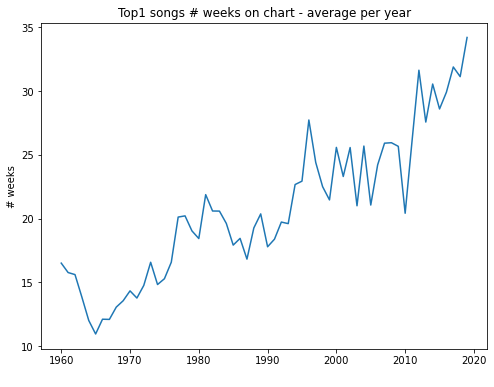

In [222]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average_no1)
plt.xlabel(" ")
plt.ylabel("# weeks")
plt.title("Top1 songs # weeks on chart - average per year");

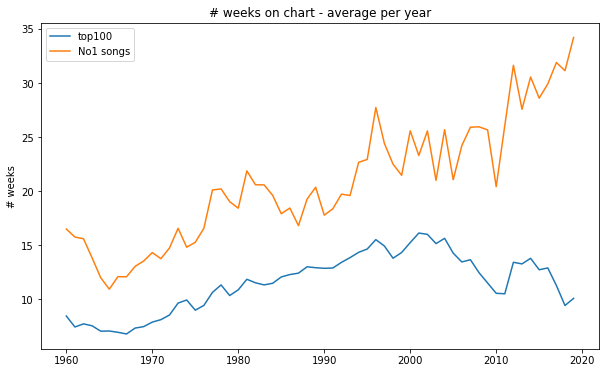

In [224]:
plt.figure(figsize=(10,6))
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average)
sns.lineplot(x="Year", y="Weeks on chart max", data=week_average_no1)
plt.xlabel(" ")
plt.ylabel("# weeks")
plt.title("# weeks on chart - average per year");
plt.legend(['top100', 'No1 songs']);

In [261]:
spotify.groupby('artists')['id'].nunique().sort_values(ascending=False).head(20)


artists
Bob Dylan                   539
The Rolling Stones          512
The Beach Boys              491
Queen                       426
The Beatles                 410
Fleetwood Mac               398
Elvis Presley               379
Johnny Cash                 362
Frank Sinatra               351
Led Zeppelin                338
Bob Marley & The Wailers    293
Elton John                  272
Stevie Wonder               259
The Who                     254
Grateful Dead               249
Marvin Gaye                 242
Nina Simone                 238
Metallica                   238
Vicente Fernández           236
The Kinks                   221
Name: id, dtype: int64